<a href="https://colab.research.google.com/github/poojayadao12/Google-Stock-Price-Prediction/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get dataset Uploaded
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [ ]:
# Scaling using Min Max Scaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Set the training data
X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    Y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(1198, 60)
(1198,)


In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

# Importing the Crucial Libraries and Adding Different Layers to LSTM for Building the Model.

In [ ]:
!pip install Keras

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50,return_sequences= True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences= True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences= True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')
regressor.fit(X_train,Y_train,epochs=100, batch_size= 22)

Epoch 1/100
55/55 [==============================] - 16s 106ms/step - loss: 0.0285
Epoch 2/100
55/55 [==============================] - 7s 131ms/step - loss: 0.0055
Epoch 3/100
55/55 [==============================] - 6s 114ms/step - loss: 0.0050
Epoch 4/100
55/55 [==============================] - 8s 145ms/step - loss: 0.0045
Epoch 5/100
55/55 [==============================] - 7s 128ms/step - loss: 0.0061
Epoch 6/100
55/55 [==============================] - 8s 152ms/step - loss: 0.0048
Epoch 7/100
55/55 [==============================] - 7s 133ms/step - loss: 0.0041
Epoch 8/100
55/55 [==============================] - 7s 128ms/step - loss: 0.0045
Epoch 9/100
55/55 [==============================] - 7s 120ms/step - loss: 0.0043
Epoch 10/100
55/55 [==============================] - 6s 114ms/step - loss: 0.0044
Epoch 11/100
55/55 [==============================] - 9s 170ms/step - loss: 0.0038
Epoch 12/100
55/55 [==============================] - 7s 123ms/step - loss: 0.0039
Epoch 13/100

# Extracting the Actual Stock Prices of Jan-2017

In [ ]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Train.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

# **Preparing the Input for the Model.**

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis= 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test =[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

**Predicting the Values for Jan 2017 Stock Prices.**

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


**Plotting the Actual and Predicted Prices for Google Stocks.**

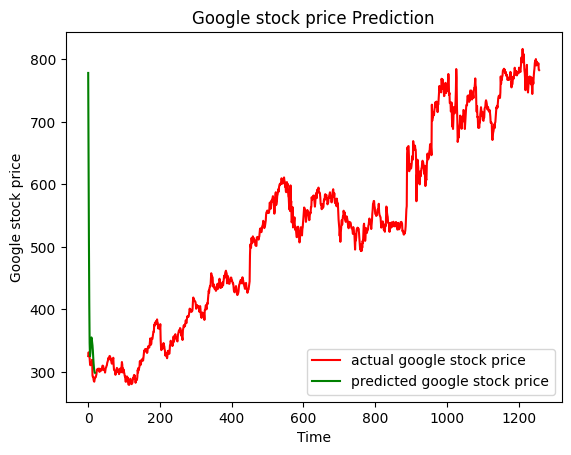

In [ ]:
plt.plot(actual_stock_price, color ='red' ,label= 'actual google stock price')
plt.plot(predicted_stock_price, color ='green' ,label= 'predicted google stock price')
plt.title('Google stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()